In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [2]:
data = pd.read_csv('lynx.csv', index_col='Year',parse_dates=True)
lynx=data["Annual number of lynx trapped"]

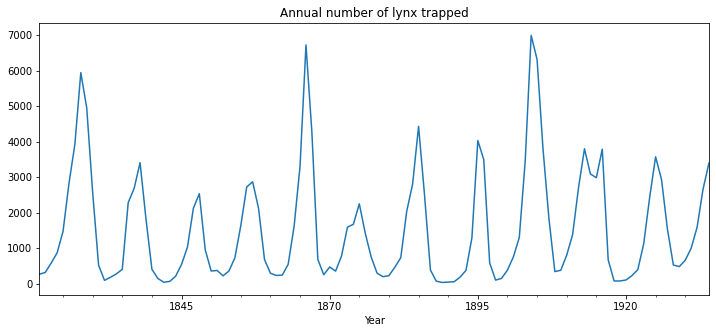

In [3]:
lynx.plot(figsize=(12,5))
plt.title("Annual number of lynx trapped")
plt.show()

# AR

In [4]:
matrix=np.array([lynx.iloc[12:-1],lynx.iloc[0:-2],np.ones((lynx.size-2))]).transpose()

In [5]:
matrix

array([[3.210e+02, 2.690e+02, 1.000e+00],
       [5.850e+02, 3.210e+02, 1.000e+00],
       [8.710e+02, 5.850e+02, 1.000e+00],
       [1.475e+03, 8.710e+02, 1.000e+00],
       [2.821e+03, 1.475e+03, 1.000e+00],
       [3.928e+03, 2.821e+03, 1.000e+00],
       [5.943e+03, 3.928e+03, 1.000e+00],
       [4.950e+03, 5.943e+03, 1.000e+00],
       [2.577e+03, 4.950e+03, 1.000e+00],
       [5.230e+02, 2.577e+03, 1.000e+00],
       [9.800e+01, 5.230e+02, 1.000e+00],
       [1.840e+02, 9.800e+01, 1.000e+00],
       [2.790e+02, 1.840e+02, 1.000e+00],
       [4.090e+02, 2.790e+02, 1.000e+00],
       [2.285e+03, 4.090e+02, 1.000e+00],
       [2.685e+03, 2.285e+03, 1.000e+00],
       [3.409e+03, 2.685e+03, 1.000e+00],
       [1.824e+03, 3.409e+03, 1.000e+00],
       [4.090e+02, 1.824e+03, 1.000e+00],
       [1.510e+02, 4.090e+02, 1.000e+00],
       [4.500e+01, 1.510e+02, 1.000e+00],
       [6.800e+01, 4.500e+01, 1.000e+00],
       [2.130e+02, 6.800e+01, 1.000e+00],
       [5.460e+02, 2.130e+02, 1.00

In [6]:
def fun(fi1,fi2,a):
    return np.sum((lynx.iloc[2:]-matrix.dot(np.array([fi1,fi2,a])))**2)/lynx.size-2

In [7]:
result=minimize(lambda x: fun(x[0],x[1],x[2]), (0,0,0))
fi1_fi2_a=result.x
result

      fun: 763048.944556088
 hess_inv: array([[ 4.16422871e-07, -3.03164890e-07, -1.69294643e-04],
       [-3.03164890e-07,  4.15711860e-07, -1.55533021e-04],
       [-1.69294643e-04, -1.55533021e-04,  9.50627099e-01]])
      jac: array([0.0390625, 0.0234375, 0.       ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 323
      nit: 7
     njev: 78
   status: 2
  success: False
        x: array([ 1.15242248e+00, -6.06229162e-01,  7.10106239e+02])

In [8]:
def shift(y, n):
        return np.concatenate((np.full(n, np.nan), y))


In [9]:
y_pred=matrix.dot(fi1_fi2_a)
data["AR"]=shift(y_pred, 2)

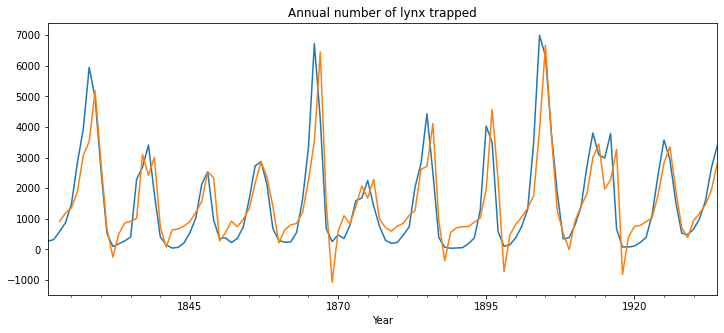

In [10]:
lynx.plot(figsize=(12,5))
data["AR"].plot(figsize=(12,5))
plt.title("Annual number of lynx trapped")
plt.show()

# MA

In [11]:
e=(lynx-shift(y_pred, 2))[2:]

In [12]:
matrix_of_e=np.array([e.iloc[1:-1],e.iloc[0:-2],np.ones((e.size-2))]).transpose()

In [13]:
def fun1(teta1,teta2,b):
    return np.sum((e.iloc[2:]-matrix_of_e.dot(np.array([teta1,teta2,b])))**2)/e.size-2

In [14]:
result2=minimize(lambda x: fun1(x[0],x[1],x[2]), (0,0,0))
teta1_teta2_b=result2.x
result2

      fun: 757327.0863054765
 hess_inv: array([[6.47441198e-07, 1.39392547e-08, 6.47441198e-07],
       [1.39392547e-08, 6.50606151e-07, 1.39392547e-08],
       [6.47441198e-07, 1.39392547e-08, 6.47455523e-07]])
      jac: array([0.0078125, 0.0234375, 0.       ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 68
      nit: 6
     njev: 17
   status: 2
  success: False
        x: array([-0.02090985, -0.1495233 ,  4.081812  ])

In [15]:
e_pred=matrix_of_e.dot(teta1_teta2_b)
data["AR+MA"]=shift(y_pred, 2)+shift(e_pred, 4)

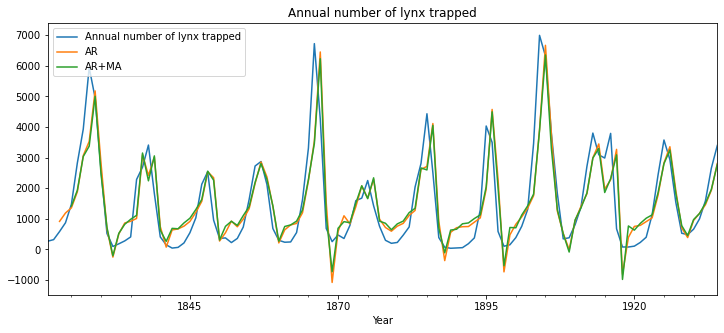

In [16]:
lynx.plot(figsize=(12,5))
data["AR"].plot(figsize=(12,5))
data["AR+MA"].plot(figsize=(12,5))
plt.legend()
plt.title("Annual number of lynx trapped")
plt.show()

## Посчитаем среднеквадратическую ошибку

In [17]:
((lynx[2:]- y_pred) ** 2).mean() #для AR

776676.8542803038

In [18]:
((lynx[4:]- (shift(y_pred, 2)+shift(e_pred, 4))[4:]) ** 2).mean() #для AR+MA

771098.7060564851